In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import operator
import json
np.random.seed(0)

class MPNeuron:
    
    def __init__(self):
        self.theta = None
        
    def mp_neuron(self, x):
        if sum(x) >= self.theta:
            return 1
        return 0
    
    def fit_brute_force(self, X, Y):
        accuracy = {}
        for theta in tqdm_notebook(range(0, X.shape[1]+1), total=X.shape[1]+1):
            self.theta = theta
            Y_pred = self.predict(X)
            accuracy[theta] = accuracy_score(Y, Y_pred)  
            
        sorted_accuracy = sorted(accuracy.items(), key=operator.itemgetter(1), reverse=True)
        best_theta, best_accuracy = sorted_accuracy[0]
        self.theta = best_theta
        
    def fit(self, X, Y, epochs=10, log=False, display_plot=False):
        self.theta = (X.shape[1]+1)//2
        if log or display_plot:
            accuracy = {}
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            Y_pred = self.predict(X)
            tn, fp, fn, tp = confusion_matrix(Y, Y_pred).ravel()
            if fp > fn and self.theta <= X.shape[1]:
                self.theta += 1
            elif fp < fn and self.theta >= 1:
                self.theta -= 1
            else:
                continue
                
            if log or display_plot:
                Y_pred = self.predict(X)
                accuracy[i] = accuracy_score(Y, Y_pred)
        if log:
            with open('mp_neuron_accuracy.json', 'w') as fp:
                json.dump(accuracy, fp)
        if display_plot:
            epochs_, accuracy_ = zip(*accuracy.items())
            plt.plot(epochs_, accuracy_)
            plt.xlabel("Epochs")
            plt.ylabel("Train Accuracy")
            plt.show()
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.mp_neuron(x)
            Y.append(result)
        return np.array(Y)


class Perceptron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.sum(self.w * x) + self.b
    
    def fit(self, X, Y, epochs=10, learning_rate=0.01, log=False, display_plot=False):
        # initialise the weights and bias
        self.w = np.random.randn(1, X.shape[1])
        self.b = 0
        if log or display_plot: 
            accuracy = {}
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            for x, y in zip(X, Y):
                result = self.perceptron(x)
                if y == 1 and result < 0:
                    self.w += learning_rate*x
                    self.b += learning_rate
                elif y == 0 and result >= 0:
                    self.w -= learning_rate*x
                    self.b -= learning_rate
            if log or display_plot:
                Y_pred = self.predict(X)
                accuracy[i] = accuracy_score(Y, Y_pred)
        if log:
            with open('perceptron_accuracy.json', 'w') as fp:
                json.dump(accuracy, fp)
        if display_plot:
            epochs_, accuracy_ = zip(*accuracy.items())
            plt.plot(epochs_, accuracy_)
            plt.xlabel("Epochs")
            plt.ylabel("Train Accuracy")
            plt.show()
                    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.perceptron(x)
            Y.append(int(result>=0))
        return np.array(Y)


class PerceptronWithSigmoid:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.sum(self.w * x) + self.b
    
    def sigmoid(self, z):
        return 1. / (1. + np.exp(-z))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs=10, learning_rate=0.01, log=False, display_plot=False):
        # initialise the weights and bias
        self.w = np.random.randn(1, X.shape[1])
        self.b = 0
        if log or display_plot: 
            #accuracy = {}
            mse = {}
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw, db = 0, 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= learning_rate*dw
            self.b -= learning_rate*db
            
            if log or display_plot:
                Y_pred = self.predict(X)
                #Y_binarized = (Y >= SCALED_THRESHOLD).astype(np.int)
                #Y_pred_binarized = (Y_pred >= SCALED_THRESHOLD).astype(np.int)
                #accuracy[i] = accuracy_score(Y_binarized, Y_pred_binarized)
                mse[i] = mean_squared_error(Y, Y_pred)
        if log:
            #with open('perceptron_with_sigmoid_accuracy.json', 'w') as fp:
                #json.dump(accuracy, fp)
            with open('perceptron_with_sigmoid_mse.json', 'w') as fp:
                json.dump(mse, fp)
        if display_plot:
            #epochs_, accuracy_ = zip(*accuracy.items())
            #plt.plot(epochs_, accuracy_)
            #plt.xlabel("Epochs")
            #plt.ylabel("Train Accuracy")
            #plt.show()
            epochs_, mse_ = zip(*mse.items())
            plt.plot(epochs_, mse_)
            plt.xlabel("Epochs")
            plt.ylabel("Train Error (MSE)")
            plt.show()
            
                    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.sigmoid(self.perceptron(x))
            Y.append(result)
        return np.array(Y)




In [0]:
import sklearn
digits = sklearn.datasets.load_digits(n_class=2)

In [0]:
X = digits.data
Y = digits.target

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#**PERCEPTRON MODEL**

In [0]:
pep = Perceptron()

In [80]:
pep.fit(X_train,y_train,learning_rate=0.001,epochs=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
y_hatpep=pep.predict(X_test)

In [82]:
accuracy_score(y_test,y_hatpep)*100

100.0

In [140]:
confusion_matrix(y_test,y_hatpep)

array([[56,  0],
       [ 0, 52]])

#**Perceptron with sigmoid**

In [0]:
pep_sig = PerceptronWithSigmoid()

In [106]:
pep_sig.fit(X_train,y_train,learning_rate=0.001,epochs=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
y_hatpep_sig = pep_sig.predict(X_test)

In [0]:
y_hatpep_sig[y_hatpep_sig > 1] = 1

In [118]:
accuracy_score(y_test,y_hatpep_sig)*100

ValueError: ignored

In [87]:
y_hatpep_sig

array([9.52162824e-24, 8.63118370e-20, 1.54247736e-21, 3.16771470e-40,
       8.95472928e-21, 4.39484207e-27, 2.72901993e-21, 7.64988766e-51,
       5.20542736e-28, 1.67379629e-01, 4.93089048e-20, 1.18761965e-38,
       8.59362112e-19, 2.79263687e-16, 5.39522690e-15, 2.29225392e-29,
       1.00000000e+00, 7.92843518e-22, 2.19073546e-56, 1.14424802e-38,
       1.75820837e-16, 2.29392393e-32, 1.32687425e-21, 2.83529208e-30,
       2.65868958e-45, 8.34162690e-13, 3.96310090e-25, 1.77261108e-40,
       5.73511853e-27, 1.10747849e-10, 9.80258823e-26, 7.59269130e-39,
       3.68456698e-23, 6.08753813e-42, 6.50804305e-01, 2.74855870e-56,
       7.22189404e-29, 2.52479913e-10, 4.71999954e-32, 1.11497428e-24,
       1.12251532e-36, 6.46083034e-17, 2.41035172e-38, 1.14653674e-31,
       2.16244235e-14, 8.25144173e-45, 3.09489669e-50, 1.03185915e-54,
       1.42581130e-48, 3.23904728e-41, 2.05657381e-38, 3.78718657e-24,
       2.86115673e-14, 3.69064525e-12, 9.49273839e-28, 2.08935789e-24,
      

#**MP neuron**

In [0]:
mp = MPNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


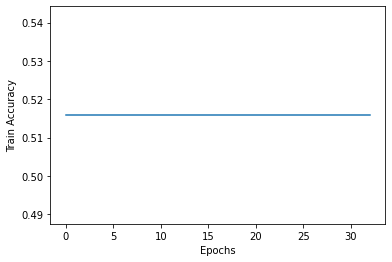

In [97]:
mp.fit(X_train,y_train,epochs=100,display_plot=True)

In [0]:
y_hatmp=mp.predict(X_test)

In [96]:
accuracy_score(y_test,y_hatmp)*100

48.148148148148145

In [101]:
mp.fit_brute_force(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
y_hatmpbf = mp.predict(X_test)

In [142]:
accuracy_score(y_test,y_hatmpbf)*100

48.148148148148145

In [143]:
confusion_matrix(y_test,y_hatmpbf)

array([[ 0, 56],
       [ 0, 52]])